In [7]:
#installing opencv to read images
!pip install opencv-python

#importing necessary libraries

#importing numpy for multidimensional arrays and matrices
import numpy as np

#pandas for analysis, data cleaning 
import pandas as pd

#plyplot for visualising data on a plot, pie chart and showing image
from matplotlib import pyplot as plt

#seaborn for hist plots 
import seaborn as sns

#os for making, editing and removing directory
import os

import glob

#tensorflow for open source library to input keras 
import tensorflow as tf
print('Tensorflow version :',tf.__version__)
#keras to create artificial neural networks(CNN)
from tensorflow import keras
print('Keras version:',keras.__version__)
#cv2(open cv) in order to read  images
import cv2

#element tree to parase xml files
from xml.etree import ElementTree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Tensorflow version : 2.9.2
Keras version: 2.9.0


In [75]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3,  padding='same', activation = 'relu', input_shape = (35,35,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3,  padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 3,  padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units = 500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 35, 35, 16)        448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 17, 17, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)        

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#file location of face-mask-detection/annotations into annotations
annotations='drive/MyDrive/ECE539/input/face-mask-detection/annotations'
#file location of face-mask-detection/images into images
images='drive/MyDrive/ECE539/input/face-mask-detection/images'

In [10]:
#listing all annoations into annootations_files
annotation_files= !ls 'drive/MyDrive/ECE539/input/face-mask-detection/annotations'
annotation_files[:5]

['maksssksksss0.xml    maksssksksss357.xml  maksssksksss613.xml',
 'maksssksksss100.xml  maksssksksss358.xml  maksssksksss614.xml',
 'maksssksksss101.xml  maksssksksss359.xml  maksssksksss615.xml',
 'maksssksksss102.xml  maksssksksss35.xml   maksssksksss616.xml',
 'maksssksksss103.xml  maksssksksss360.xml  maksssksksss617.xml']

In [11]:
#listing all images into image_files
image_files= !ls 'drive/MyDrive/ECE539/input/face-mask-detection/images'
image_files[:5]

['maksssksksss0.png    maksssksksss357.png  maksssksksss613.png',
 'maksssksksss100.png  maksssksksss358.png  maksssksksss614.png',
 'maksssksksss101.png  maksssksksss359.png  maksssksksss615.png',
 'maksssksksss102.png  maksssksksss35.png   maksssksksss616.png',
 'maksssksksss103.png  maksssksksss360.png  maksssksksss617.png']

In [12]:
#total number of files and images in the dataset which must be equivalent to each other
len(annotation_files),len(image_files)

(285, 285)

**Extraction of data**

**Extraction of data from images
extracting necessary information present in the xmin,ymin,height,labels and weight of all images

In [13]:
#to extract necessary info present in the xml document in a dictionary format
info={
    'xmin':[],
    'ymin':[],
    'xmax':[],
    'ymax':[],
    'label':[],
    'file':[],
    'width':[],
    'height':[]    
}
#finding all files ending with xml
for i in glob.glob(annotations+'/*.xml'):
    #parsing all xml files with element tree
    tree=ElementTree.parse(i)
    #getting all the neceesary attribute info into the dictionary
    for element in tree.iter():
        
        if 'size' in element.tag:
            for attri in list(element):
                if 'width' in attri.tag:
                    width=int(round(float(attri.text)))
                if 'height' in attri.tag:
                    height=int(round(float(attri.text)))
    
        if 'object' in element.tag:
            for attri in list(element):
            
                if 'name' in attri.tag:
                    name=attri.text
                    info['label']+=[name]
                    info['width']+=[width]
                    info['height']+=[height]
                    #file name present as ../input/face-mask-detection/annotations/maksssksksss.xml 
                    #so spliting name by '/' then using last portion thats-  makssksksss.xml -{.xml} 
                    info['file']+=[i.split('/')[-1][0:-4]]

                
                if 'bndbox' in attri.tag:
                    for dimension in list(attri):
                        if 'xmin' in dimension.tag:
                            xmin=int(round(float(dimension.text)))
                            info['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin=int(round(float(dimension.text)))
                            info['ymin']+=[ymin]
                        if 'xmax' in dimension.tag:
                            xmax=int(round(float(dimension.text)))
                            info['xmax']+=[xmax]
                        if 'ymax' in dimension.tag:
                            ymax=int(round(float(dimension.text)))
                            info['ymax']+=[ymax]
            
        

In [14]:
#for aligning dictionary in form of 2D structure in tables and columns which is mutuable
annotations_info_df = pd.DataFrame(info)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,154,51,423,391,with_mask,maksssksksss106,600,399
1,212,57,251,106,with_mask,maksssksksss102,400,225
2,216,92,372,251,with_mask,maksssksksss109,400,400
3,178,143,213,202,with_mask,maksssksksss105,400,267
4,280,103,312,145,with_mask,maksssksksss105,400,267
5,320,79,352,119,with_mask,maksssksksss105,400,267
6,365,53,390,84,with_mask,maksssksksss105,400,267
7,243,36,267,67,with_mask,maksssksksss105,400,267
8,115,47,146,87,with_mask,maksssksksss105,400,267
9,33,88,65,131,with_mask,maksssksksss105,400,267


In [15]:
#adding annotations and image file names into annotations dataframe
annotations_info_df['annotation_file']= annotations_info_df['file']+'.xml'
annotations_info_df['image_file']=annotations_info_df['file']+'.png'

annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,154,51,423,391,with_mask,maksssksksss106,600,399,maksssksksss106.xml,maksssksksss106.png
1,212,57,251,106,with_mask,maksssksksss102,400,225,maksssksksss102.xml,maksssksksss102.png
2,216,92,372,251,with_mask,maksssksksss109,400,400,maksssksksss109.xml,maksssksksss109.png
3,178,143,213,202,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
4,280,103,312,145,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
...,...,...,...,...,...,...,...,...,...,...
4067,251,72,264,89,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png
4068,292,69,306,89,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png
4069,321,56,340,77,without_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png
4070,355,67,375,90,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png


In [16]:
#used to render the image in  a 12:8 format
def render(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()
# since image read by opencv is in bgr format we need to convert it into rgb format
def convert_RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [17]:
#since 737 is a iamge at first location
annotations_info_df['image_file'].iloc[0]

'maksssksksss106.png'

In [18]:
#forming the file path of image 
image_path= 'drive/MyDrive/ECE539/input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[0]
image_path

'drive/MyDrive/ECE539/input/face-mask-detection/images/maksssksksss106.png'

In [19]:
#read image through opencv which converts image to a array of 3d martrices
image737=cv2.imread(image_path)
image737

array([[[152, 172, 173],
        [152, 172, 173],
        [156, 174, 175],
        ...,
        [114, 105,  71],
        [255, 255, 226],
        [252, 250, 216]],

       [[153, 173, 174],
        [150, 170, 171],
        [150, 168, 169],
        ...,
        [113,  97,  60],
        [110,  98,  62],
        [255, 255, 220]],

       [[153, 174, 172],
        [148, 169, 167],
        [144, 162, 161],
        ...,
        [255, 255, 214],
        [108,  84,  42],
        [185, 163, 121]],

       ...,

       [[124, 118,  99],
        [142, 138, 119],
        [147, 148, 128],
        ...,
        [ 42,  25,  16],
        [ 43,  25,  18],
        [ 49,  29,  22]],

       [[233, 237, 212],
        [254, 255, 237],
        [237, 245, 222],
        ...,
        [ 48,  31,  22],
        [ 50,  30,  23],
        [ 52,  32,  25]],

       [[ 88, 110,  85],
        [108, 130, 106],
        [ 90, 114,  90],
        ...,
        [ 57,  37,  29],
        [ 57,  37,  30],
        [ 59,  39,  32]]

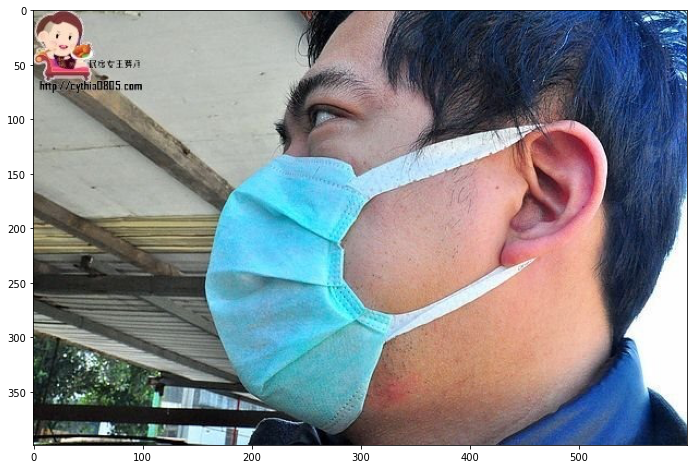

In [20]:
#rendering the image we choose in RGB format
render(convert_RGB(image737))

In [21]:
#finding corresponding annotations to the image
annotation737='drive/MyDrive/ECE539/input/face-mask-detection/annotations/' + annotations_info_df['annotation_file'].iloc[0]
annotation737

'drive/MyDrive/ECE539/input/face-mask-detection/annotations/maksssksksss106.xml'

In [22]:
#returns a tuple of the number of rows, columns, and channels
image737.shape
#here three channels represent RGB

(399, 600, 3)

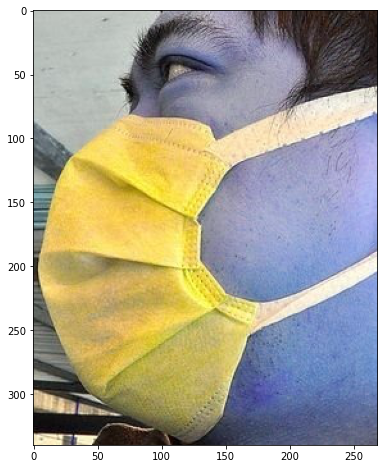

In [23]:
#Extracting information of first face from the data
x=annotations_info_df['xmin'].iloc[0]
y=annotations_info_df['ymin'].iloc[0]
width=annotations_info_df['xmax'].iloc[0]
height=annotations_info_df['ymax'].iloc[0]
#take the required slice of data from the information of first face extracted 
crop737=image737[y:height, x:width]
#rendering the image
render(crop737)

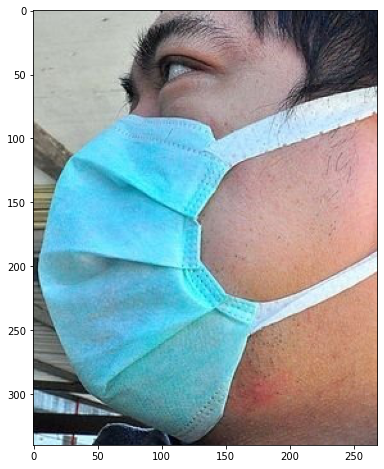

In [24]:
#Image is in pixelated form that is stretched out
#rendering image in RGB format
render(convert_RGB(crop737))

In [25]:
#After the crop ,total images should be equal to length of annotations
# which defines the number of faces present in the data

len(annotations_info_df)

4072

In [26]:
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,154,51,423,391,with_mask,maksssksksss106,600,399,maksssksksss106.xml,maksssksksss106.png
1,212,57,251,106,with_mask,maksssksksss102,400,225,maksssksksss102.xml,maksssksksss102.png
2,216,92,372,251,with_mask,maksssksksss109,400,400,maksssksksss109.xml,maksssksksss109.png
3,178,143,213,202,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
4,280,103,312,145,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
5,320,79,352,119,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
6,365,53,390,84,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
7,243,36,267,67,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
8,115,47,146,87,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png
9,33,88,65,131,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png


In [27]:
!ls 'drive/MyDrive/ECE539/input/face-mask-detection'

annotations  images


In [30]:
#making a new directory named cropped
directory= 'cropped'
parent_directory= 'drive/MyDrive/ECE539/kaggle/working'
os.mkdir(os.path.join(parent_directory,directory))

In [31]:
#checking if directory added 
!ls './'

drive  sample_data


In [32]:
#Adding Cropped image into annotation (just the file name)
annotations_info_df['cropped']=annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,154,51,423,391,with_mask,maksssksksss106,600,399,maksssksksss106.xml,maksssksksss106.png,maksssksksss106
1,212,57,251,106,with_mask,maksssksksss102,400,225,maksssksksss102.xml,maksssksksss102.png,maksssksksss102
2,216,92,372,251,with_mask,maksssksksss109,400,400,maksssksksss109.xml,maksssksksss109.png,maksssksksss109
3,178,143,213,202,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png,maksssksksss105
4,280,103,312,145,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png,maksssksksss105
...,...,...,...,...,...,...,...,...,...,...,...
4067,251,72,264,89,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498
4068,292,69,306,89,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498
4069,321,56,340,77,without_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498
4070,355,67,375,90,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498


In [33]:
#traversing through all the annonations present
for i in range(len(annotations_info_df)):
    #selecting the filepath of a single image
    image_filepath='drive/MyDrive/ECE539/input/face-mask-detection/images/'+annotations_info_df['image_file'].iloc[i]
    #reading the image
    image=cv2.imread(image_filepath)
    #adding the part and .png at the end of every file
    #example- maksssksksss212 will be given a number according to index and .png will be added
    #for it to become maksssksksss212-4071.png   
    annotations_info_df['cropped'].iloc[i]= annotations_info_df['cropped'].iloc[i] +'-'+ str(i) + '.png'
    cropped_image_filename= annotations_info_df['cropped'].iloc[i]
    #getting the dimension needed to get a cropped images
    xmin= annotations_info_df['xmin'].iloc[i]
    ymin= annotations_info_df['ymin'].iloc[i]
    xmax= annotations_info_df['xmax'].iloc[i]
    ymax= annotations_info_df['ymax'].iloc[i]
    #cropping the image to get a single face and it  to croppedimage 
    croppedimage= image[ymin:ymax, xmin:xmax]
    #saving the cropped image to the designated directory
    cv2.imwrite(os.path.join('drive/MyDrive/ECE539/kaggle/working/cropped',cropped_image_filename),croppedimage)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,154,51,423,391,with_mask,maksssksksss106,600,399,maksssksksss106.xml,maksssksksss106.png,maksssksksss106-0.png
1,212,57,251,106,with_mask,maksssksksss102,400,225,maksssksksss102.xml,maksssksksss102.png,maksssksksss102-1.png
2,216,92,372,251,with_mask,maksssksksss109,400,400,maksssksksss109.xml,maksssksksss109.png,maksssksksss109-2.png
3,178,143,213,202,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png,maksssksksss105-3.png
4,280,103,312,145,with_mask,maksssksksss105,400,267,maksssksksss105.xml,maksssksksss105.png,maksssksksss105-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,251,72,264,89,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498-4067.png
4068,292,69,306,89,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498-4068.png
4069,321,56,340,77,without_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498-4069.png
4070,355,67,375,90,with_mask,maksssksksss498,400,272,maksssksksss498.xml,maksssksksss498.png,maksssksksss498-4070.png


In [35]:
#listing all images into cropped
cropped=!ls 'drive/MyDrive/ECE539/kaggle/working/cropped'
cropped[:10]

['maksssksksss0-86.png\t  maksssksksss354-1737.png  maksssksksss603-1943.png',
 'maksssksksss0-87.png\t  maksssksksss354-1738.png  maksssksksss603-1944.png',
 'maksssksksss0-88.png\t  maksssksksss354-1739.png  maksssksksss603-1945.png',
 'maksssksksss100-17.png\t  maksssksksss354-1740.png  maksssksksss603-1946.png',
 'maksssksksss100-18.png\t  maksssksksss354-1741.png  maksssksksss603-1947.png',
 'maksssksksss100-19.png\t  maksssksksss354-1742.png  maksssksksss603-1948.png',
 'maksssksksss101-46.png\t  maksssksksss354-1743.png  maksssksksss603-1949.png',
 'maksssksksss102-1.png\t  maksssksksss354-1744.png  maksssksksss603-1950.png',
 'maksssksksss103-65.png\t  maksssksksss354-1745.png  maksssksksss603-1951.png',
 'maksssksksss103-66.png\t  maksssksksss354-1746.png  maksssksksss603-1952.png']

In [36]:
#check to see if total cropped images are 4072 as stated earlier
print('Total croped images are: ',format(len(cropped)))

Total croped images are:  1358


In [37]:
#getting the file name
annotations_info_df['cropped'].iloc[0]

'maksssksksss106-0.png'

In [38]:
#getting location of the file
cropped737_0path= 'drive/MyDrive/ECE539/kaggle/working/cropped/'+annotations_info_df['cropped'].iloc[0]
cropped737_0path

'drive/MyDrive/ECE539/kaggle/working/cropped/maksssksksss106-0.png'

In [39]:
#reading the image using cv2 
cropped737_0= cv2.imread(cropped737_0path)
cropped737_0

array([[[188, 194, 189],
        [189, 195, 190],
        [189, 195, 190],
        ...,
        [ 53,  35,  28],
        [ 53,  35,  28],
        [ 48,  30,  23]],

       [[186, 192, 187],
        [187, 193, 188],
        [187, 193, 188],
        ...,
        [ 41,  25,  18],
        [ 53,  37,  30],
        [ 53,  37,  31]],

       [[185, 191, 186],
        [185, 191, 186],
        [186, 192, 187],
        ...,
        [ 48,  32,  25],
        [ 49,  33,  26],
        [ 53,  37,  31]],

       ...,

       [[242, 232, 192],
        [249, 239, 199],
        [252, 242, 202],
        ...,
        [ 98,  99, 119],
        [ 92,  93, 113],
        [ 87,  89, 107]],

       [[234, 224, 184],
        [251, 238, 199],
        [255, 246, 204],
        ...,
        [ 96,  97, 117],
        [ 90,  91, 111],
        [ 88,  90, 108]],

       [[235, 223, 181],
        [252, 238, 196],
        [255, 247, 203],
        ...,
        [ 96,  97, 117],
        [ 94,  95, 115],
        [ 93,  95, 113]]

In [40]:
#getting height, width and channels of the image
cropped737_0.shape

(340, 269, 3)

**Train Test Split**

In [41]:
#spliting the data into 80-20% for train and test respectively
from sklearn.model_selection import train_test_split
train_df,test_df= train_test_split(annotations_info_df,test_size=0.20)

In [42]:
#getting the shape of the dataframe
print('The Shape of TrainingSet:',train_df.shape)
print('The Shape of TestSet:',test_df.shape)

The Shape of TrainingSet: (3257, 11)
The Shape of TestSet: (815, 11)


In [43]:
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
2929,103,1,115,15,with_mask,maksssksksss301,400,225,maksssksksss301.xml,maksssksksss301.png,maksssksksss301-2929.png
2516,264,69,270,75,with_mask,maksssksksss89,400,217,maksssksksss89.xml,maksssksksss89.png,maksssksksss89-2516.png
2741,246,50,271,82,with_mask,maksssksksss227,400,267,maksssksksss227.xml,maksssksksss227.png,maksssksksss227-2741.png
2649,142,280,225,387,with_mask,maksssksksss485,301,400,maksssksksss485.xml,maksssksksss485.png,maksssksksss485-2649.png
3389,123,45,138,59,with_mask,maksssksksss829,400,200,maksssksksss829.xml,maksssksksss829.png,maksssksksss829-3389.png


In [44]:
#checking for the number of categories of the image label
classes= list(train_df['label'].unique())
classes

['with_mask', 'without_mask', 'mask_weared_incorrect']

In [45]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
2929,103,1,115,15,with_mask,maksssksksss301,400,225,maksssksksss301.xml,maksssksksss301.png,maksssksksss301-2929.png
2516,264,69,270,75,with_mask,maksssksksss89,400,217,maksssksksss89.xml,maksssksksss89.png,maksssksksss89-2516.png
2741,246,50,271,82,with_mask,maksssksksss227,400,267,maksssksksss227.xml,maksssksksss227.png,maksssksksss227-2741.png
2649,142,280,225,387,with_mask,maksssksksss485,301,400,maksssksksss485.xml,maksssksksss485.png,maksssksksss485-2649.png
3389,123,45,138,59,with_mask,maksssksksss829,400,200,maksssksksss829.xml,maksssksksss829.png,maksssksksss829-3389.png
...,...,...,...,...,...,...,...,...,...,...,...
1436,57,25,76,44,with_mask,maksssksksss284,400,226,maksssksksss284.xml,maksssksksss284.png,maksssksksss284-1436.png
456,298,39,314,57,with_mask,maksssksksss359,400,226,maksssksksss359.xml,maksssksksss359.png,maksssksksss359-456.png
3196,311,37,339,72,with_mask,maksssksksss90,400,267,maksssksksss90.xml,maksssksksss90.png,maksssksksss90-3196.png
248,42,27,69,52,without_mask,maksssksksss627,400,225,maksssksksss627.xml,maksssksksss627.png,maksssksksss627-248.png


In [46]:
#Doing object classification on single random image to see if person 
#in the image is masked ,no masked and incorrectly worn
train_df[train_df['file']=='maksssksksss52']['label'].unique()

array(['with_mask', 'without_mask', 'mask_weared_incorrect'], dtype=object)

In [47]:
#reading the image
image52_path='drive/MyDrive/ECE539/input/face-mask-detection/images/maksssksksss52.png'
image52= cv2.imread(image52_path)
image52

array([[[201, 186, 190],
        [178, 169, 171],
        [126, 120, 121],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[178, 164, 164],
        [168, 159, 157],
        [163, 157, 154],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[146, 135, 132],
        [145, 138, 134],
        [148, 144, 139],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       ...,

       [[ 29,  30,  33],
        [ 29,  30,  33],
        [ 29,  30,  33],
        ...,
        [ 42,  50,  58],
        [ 40,  48,  56],
        [ 42,  51,  59]],

       [[ 31,  32,  33],
        [ 31,  32,  33],
        [ 31,  33,  33],
        ...,
        [ 41,  49,  57],
        [ 41,  49,  57],
        [ 45,  53,  61]],

       [[ 34,  35,  36],
        [ 35,  37,  38],
        [ 37,  39,  40],
        ...,
        [ 42,  50,  58],
        [ 39,  47,  55],
        [ 44,  52,  60]]

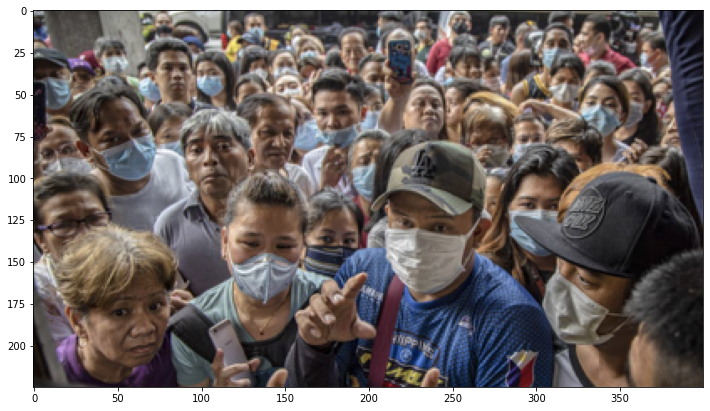

In [48]:
#rendering the image in RGB format
image52_rgb=convert_RGB(image52)
render(image52_rgb)

In [49]:
#finding annotations corresponding to the image 
image52_df=train_df[train_df['file']== 'maksssksksss52']
image52_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
2097,286,73,307,90,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2097.png
2052,6,117,47,149,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2052.png
2063,221,51,246,77,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2063.png
2080,185,20,200,37,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2080.png
2062,168,57,196,85,mask_weared_incorrect,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2062.png
2078,154,13,163,24,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2078.png
2055,76,69,92,88,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2055.png
2082,194,54,211,73,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2082.png
2056,92,74,129,113,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2056.png
2058,161,130,195,163,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-2058.png


In [50]:
#adding the persons into withmask ,withoutmask, incorrectly worn lists 
withmaskl,withoutmaskl,incorrectl=[],[],[]
for i in range(len(image52_df)):
    bb= [image52_df['xmin'].iloc[i],
        image52_df['ymin'].iloc[i],
        image52_df['xmax'].iloc[i],
        image52_df['ymax'].iloc[i]]
    if image52_df['label'].iloc[i]== 'with_mask':
        withmaskl.append(bb)
    elif image52_df['label'].iloc[i]=='without_mask':
        withoutmaskl.append(bb)
    else:
        incorrectl.append(bb)
#creating a dictionary with the lists above
foundobjectdict= {
    'With Mask': withmaskl,
    'Without Mask': withoutmaskl,
    'Incorrectly Worn': incorrectl
}
foundobjectdict

{'With Mask': [[286, 73, 307, 90],
  [154, 13, 163, 24],
  [76, 69, 92, 88],
  [194, 54, 211, 73],
  [161, 130, 195, 163],
  [157, 61, 173, 84],
  [94, 22, 103, 33],
  [303, 147, 352, 203],
  [145, 42, 160, 56],
  [304, 16, 322, 36],
  [352, 48, 366, 71],
  [116, 132, 161, 175],
  [41, 23, 58, 40],
  [73, 5, 84, 16],
  [97, 34, 115, 53],
  [2, 77, 35, 99],
  [115, 10, 120, 19],
  [260, 74, 285, 97],
  [250, 4, 261, 16],
  [209, 119, 262, 170],
  [191, 84, 208, 117],
  [310, 39, 329, 58],
  [328, 51, 352, 77],
  [63, 37, 77, 56],
  [205, 6, 210, 18],
  [129, 7, 139, 19],
  [1, 34, 24, 61],
  [197, 37, 214, 58],
  [39, 65, 75, 103],
  [143, 29, 160, 42],
  [127, 31, 142, 44],
  [228, 9, 236, 19]],
 'Without Mask': [[6, 117, 47, 149],
  [221, 51, 246, 77],
  [185, 20, 200, 37],
  [92, 74, 129, 113],
  [276, 9, 284, 19],
  [131, 67, 157, 97],
  [246, 51, 256, 72],
  [378, 61, 388, 84],
  [37, 166, 84, 214],
  [74, 31, 96, 53]],
 'Incorrectly Worn': [[168, 57, 196, 85],
  [254, 30, 272, 47]

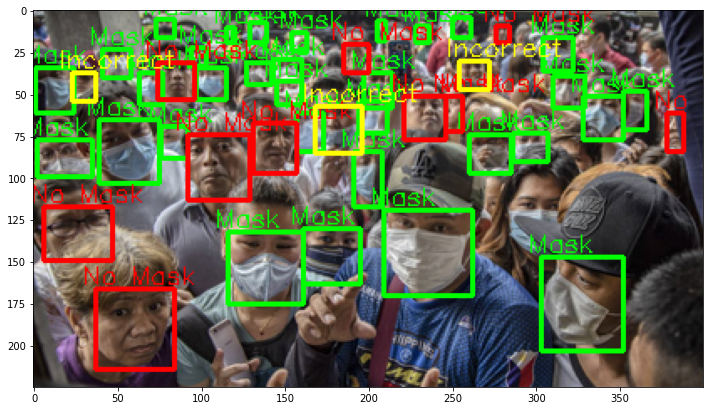

In [51]:
#traversing through the dictionary 
for key, value in foundobjectdict.items():
    #assigning color according to label the person has
    for i in range(len(value)):
        #by default , color and text for masked person to be: 'green' and 'mask' 
        color= (0,255,0)
        text='Mask'
        if key=='Without Mask':
            #color and text for unmasked person to be: 'red' and 'no mask'
            color= (255,0,0)
            text='No Mask'
        elif key== 'Incorrectly Worn':
            #color text for incorrectly worn masked person to be: 'yellow' and 'incorrect'
            color= (255,255,0)
            text='Incorrect'
        #finfing corners of starting line and ending lines of the face of person
        start=(value[i][0],value[i][1])
        end=(value[i][2],value[i][3])
        #creating a rectangle across the face according to the color
        cv2.rectangle(image52_rgb,start,end,color=color,thickness=2)
        #putting text on image with the rectangle
        cv2.putText(image52_rgb, org= (value[i][0]-8,value[i][1]-3),text=text,
                   fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=color)
#rendering image with the updates on the image
render(image52_rgb)

**Exploratory Data Analysis**

In [52]:
#counted occurence of the label of images 
train_df['label'].value_counts()

with_mask                2597
without_mask              563
mask_weared_incorrect      97
Name: label, dtype: int64

In [53]:
#creating a sorted label into a Two-dimensional mutable dataframe with index 0,1,2 
sortedlabel=pd.DataFrame(train_df['label'].value_counts()).reset_index()
sortedlabel.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sortedlabel

,label,count
0,with_mask,2597
1,without_mask,563
2,mask_weared_incorrect,97


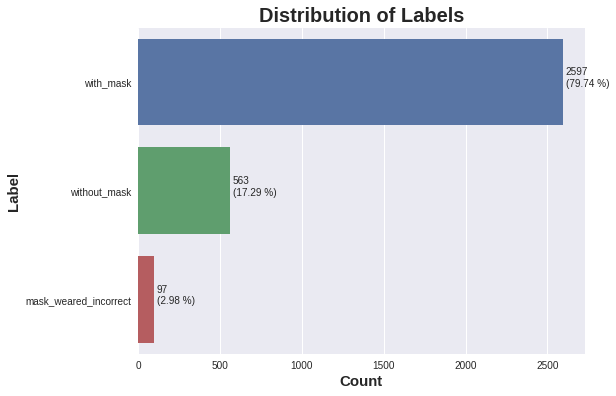

In [54]:
#plotting the barplot of the label occurred
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))

barplot = sns.barplot(x = 'count', y = 'label', data = sortedlabel)
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    #to calculate percentage of each label in the data specified
    percentage = round(width * 100 / sum(sortedlabel['count']), 2)
    #putting text about the numer and the percentage corresponding to each label
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [55]:
#getting the width,height and channels of first image
croppedpath = 'drive/MyDrive/ECE539/kaggle/working/cropped/' + train_df['cropped'].iloc[0]
croppedimage = cv2.imread(croppedpath)
print(croppedpath)
croppedimage.shape

drive/MyDrive/ECE539/kaggle/working/cropped/maksssksksss301-2929.png


(14, 12, 3)

In [56]:
#adding image width and image height of every image to the list 
imagewidth=[]
imageheight=[]
#traversing through the all image
for i in range(len(train_df)):
    croppedimagepath= 'drive/MyDrive/ECE539/kaggle/working/cropped/'+train_df['cropped'].iloc[i] 
    croppedimage=cv2.imread(croppedimagepath)
    #adding image height and width of the image to list
    imagewidth.append(croppedimage.shape[0])
    imageheight.append(croppedimage.shape[1])
    

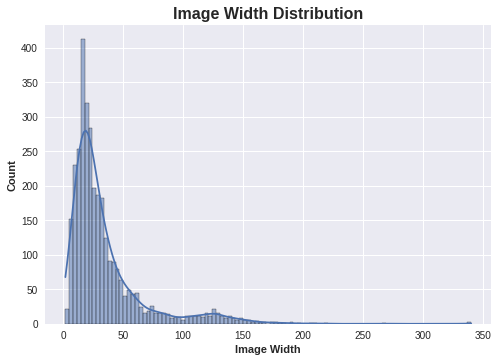

In [57]:
#plotting histogram of imagewidth
sns.histplot(imagewidth,kde=True)
plt.title('Image Width Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Width',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

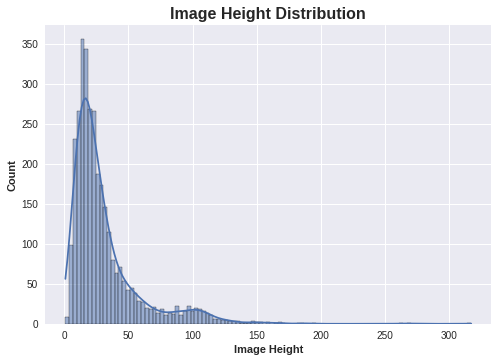

In [58]:
#plotting histogram of imageheight
sns.histplot(imageheight,kde=True)
plt.title('Image Height Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Height',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

**Preprocessing**

In [59]:
#taking median of imagewidth and imageheight as targetimage size 
targetimage=(int(np.median(imagewidth)),int(np.median(imageheight)))
targetimage

(24, 22)

In [60]:
# using imagedatagenerator expand the training dataset in order 
# to improve the performance and ability of the model to generalize.
from keras_preprocessing.image import ImageDataGenerator
#rescale=1./255 will convert the pixels in range [0,255] to range [0,1], thus normalising the data and
#contributing to total losses , moreover we are also spliting image generator for 25 percent validation set.
train_image_generator= ImageDataGenerator(rescale= 1. / 255. , validation_split=0.25)
#train image generator to generate batches of tensor train image dataset with augmentation.
train_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df, 
    directory='drive/MyDrive/ECE539/kaggle/working/cropped',
    x_col='cropped',
    y_col='label',
    #using 75%  dataset as training set
    subset='training',
    #size of batch of data being 32
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode= 'categorical',
    target_size = targetimage
    )
#valid image generator to generate batches of tensor valid image dataset with augmentation.
valid_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory= 'drive/MyDrive/ECE539/kaggle/working/cropped',
    x_col='cropped',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 2443 validated image filenames belonging to 3 classes.
Found 814 validated image filenames belonging to 3 classes.


In [95]:
#also creating image generator for test dataset for randomness
test_image_generator= ImageDataGenerator(rescale = 1./255.)
#test image generator with augmented data to test acccuracy of the model
test_generator= train_image_generator.flow_from_dataframe(
    #will use test_df as dataframe
    dataframe=test_df,
    directory= 'drive/MyDrive/ECE539/kaggle/working/cropped',
    x_col='cropped',
    y_col='label',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 815 validated image filenames belonging to 3 classes.


**Modelling**

In [62]:
#taking input shape as median of imagewidth,median of imageheight, 3 as channels because colours are RGB
inputshape= [int(np.median(imagewidth)),int(np.median(imageheight)),3]
inputshape

[24, 22, 3]

In [63]:
#using a sequential model as there exist only one input that is the image and
#only one output that is whether it is with mask, no mask or incorrectly worn mask
model1= keras.models.Sequential([
    #Conv2D creates a convolution kernel that is combined with the layer input to produce a tensor of outputs
    #here filter provides a measure for a region of the input to resemble a feature
    #kernel size specifies the height and width of the 2D convolution window
    #activation has activation function relu(Rectified Linear Unit) which keeps all negative values to be zero and all other values to be constant
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=inputshape),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    #MaxPool2D downsamples the input along its height and width by taking the maximum value over an input matrix for each channel of the input
    # pool_size signify window size (matrix window ) over which to take the maximum
    #padding valid ensure that no padding is necessary for model.
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    #flatten function will flattens the multi-dimensional input tensors into a single dimension
    keras.layers.Flatten(),
    #Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer
    #unit size decides  the dimensionality of the output space which is 3 in this case
    #activation function softmax has been used as class is of size 3 and softmax predicts a multinomial probability distribution
    keras.layers.Dense(units=len(classes),activation='softmax')
    
    
])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 22, 20, 10)        280       
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 18, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 9, 10)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 7, 10)          910       
                                                                 
 conv2d_12 (Conv2D)          (None, 6, 5, 10)          910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 2, 10)         0         
 g2D)                                                 

In [64]:
#compiling the model by configuring the model with losses and metrics
#loss function used to find deviation in learning process;
#here categoricalcrossentrophy used as loss function because it is for multi-class classification model where there exists two or more output labels.
#optimiser optimizes the input weights by comparing the prediction and the loss function,Adam optimization is a stochastic gradient descent method as its faster
#Metrics is used to evaluate the performance of the model here mterics.recall recalls the prediction on basis of labels
model1.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',keras.metrics.Recall()])
#fit trains the model for a fixed number of epochs
#here input is train_generator, epochs represents one complete pass of the training dataset through the algorithm
#steps_per_epoch is total number of batches of samples before declaring one epoch finished so the model goes through all the test generator data once in our case
#validation data is data on which to evaluate the loss and any model metrics at the end of each epoch, model is not trained on it
#validation steps is total number of batches of samples to draw before stopping when performing validation at the end of every epoch
history1=model1.fit(train_generator,epochs=10,steps_per_epoch=len(train_generator),
                   validation_data=valid_generator,validation_steps=len(valid_generator))

Epoch 1/10
77/77 [==============================] - 10s 105ms/step - loss: 0.5730 - accuracy: 0.7962 - recall: 0.7241 - val_loss: 0.4528 - val_accuracy: 0.8096 - val_recall: 0.7555
Epoch 2/10
77/77 [==============================] - 9s 115ms/step - loss: 0.3623 - accuracy: 0.8805 - recall: 0.8469 - val_loss: 0.2982 - val_accuracy: 0.9152 - val_recall: 0.9042
Epoch 3/10
77/77 [==============================] - 10s 129ms/step - loss: 0.2908 - accuracy: 0.9190 - recall: 0.9112 - val_loss: 0.3077 - val_accuracy: 0.9042 - val_recall: 0.8993
Epoch 4/10
77/77 [==============================] - 8s 103ms/step - loss: 0.2706 - accuracy: 0.9190 - recall: 0.9120 - val_loss: 0.2666 - val_accuracy: 0.9152 - val_recall: 0.9128
Epoch 5/10
77/77 [==============================] - 8s 102ms/step - loss: 0.2433 - accuracy: 0.9226 - recall: 0.9181 - val_loss: 0.2356 - val_accuracy: 0.9287 - val_recall: 0.9238
Epoch 6/10
77/77 [==============================] - 8s 104ms/step - loss: 0.2228 - accuracy: 0.930

In [65]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result1=pd.DataFrame(history1.history)
result1

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.573015,0.796152,0.724110,0.452830,0.809582,0.755528
1,0.362283,0.880475,0.846910,0.298242,0.915233,0.904177
2,0.290817,0.918952,0.911175,0.307749,0.904177,0.899263
3,0.270557,0.918952,0.911993,0.266647,0.915233,0.912776
4,0.243336,0.922636,0.918133,0.235578,0.928747,0.923833
5,0.222837,0.930004,0.924273,0.215215,0.929975,0.922604
6,0.212583,0.934916,0.930413,0.211195,0.931204,0.926290
7,0.202924,0.939828,0.933279,0.204219,0.934889,0.931204
8,0.202896,0.939009,0.934097,0.217633,0.932432,0.929975
9,0.200873,0.937372,0.932051,0.246878,0.914005,0.909091


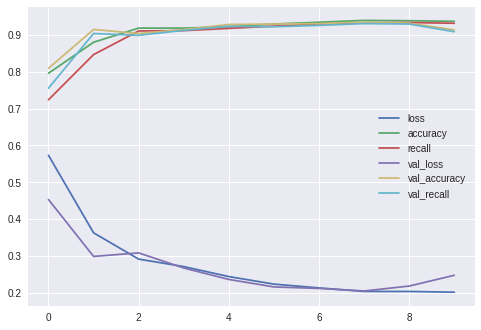

In [66]:
#plotting the result
result1.plot()

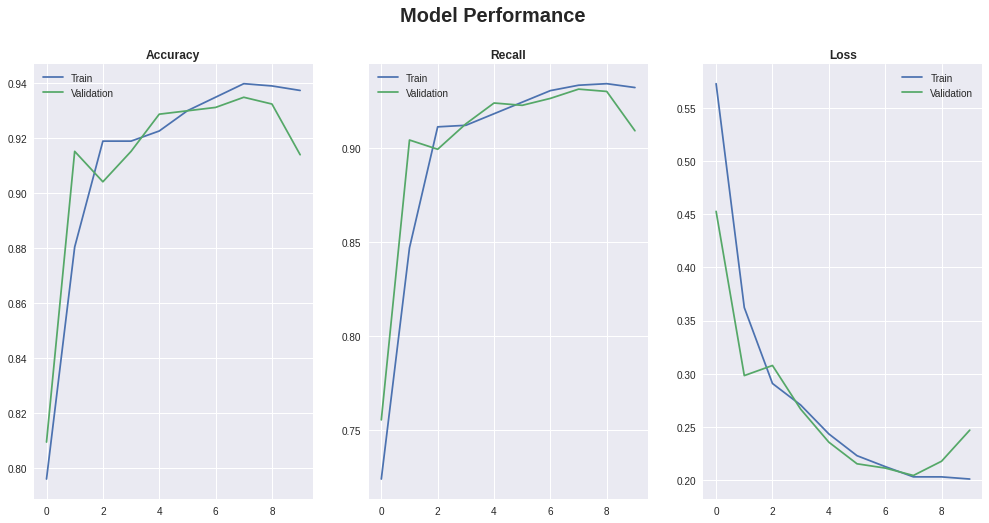

In [67]:
#plotting the lines of train and validate values returned
def plot_line(result,ax,col,title,train_col,valid_col):
    ax[col].plot(result[train_col])
    ax[col].plot(result[valid_col])
    
    ax[col].set_title(title,fontweight='bold')
    ax[col].legend(['Train','Validation'])
#plotting 3 graphs corresponding to accuracy, recall and loss
def plot_result(result,train_recol,valid_recol):
    fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(17,8))
    fig.suptitle('Model Performance', fontsize=20, fontweight='bold')
    
    plot_line(result,ax,0,'Accuracy','accuracy','val_accuracy')
    plot_line(result,ax,1,'Recall',train_recol,valid_recol)
    plot_line(result,ax,2,'Loss','loss','val_loss')
    plt.show()

#plotting the graphs for model1 result
plot_result(result1,'recall','val_recall')

**Early Stopping Callback**

In [68]:
#creating model2 of sequentical cnn 
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = inputshape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [69]:
#compiling the losses of model2
model2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])
#EarlyStopping stop training when a monitored metric has stopped improving.
#val_loss is monitored where val_loss is losses occured during validation
# mode min signifies training will stop when the quantity monitored has stopped decreasing
#verbose 1 displays messages when the callback takes an action and patience represent number of epochs with no improvement after which training will be stopped
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]
#fitting model for 100 epoches but with callback
history2 = model2.fit(train_generator,
                        epochs = 100,
                        steps_per_epoch = len(train_generator),
                        validation_data = valid_generator,
                        validation_steps = len(valid_generator),
                        callbacks = callbacks)

Epoch 1/100
77/77 [==============================] - 9s 107ms/step - loss: 0.5342 - accuracy: 0.8093 - recall_1: 0.7311 - val_loss: 0.3205 - val_accuracy: 0.8943 - val_recall_1: 0.8735
Epoch 2/100
77/77 [==============================] - 8s 99ms/step - loss: 0.3189 - accuracy: 0.8997 - recall_1: 0.8846 - val_loss: 0.3005 - val_accuracy: 0.9066 - val_recall_1: 0.8993
Epoch 3/100
77/77 [==============================] - 8s 101ms/step - loss: 0.2654 - accuracy: 0.9190 - recall_1: 0.9140 - val_loss: 0.2480 - val_accuracy: 0.9214 - val_recall_1: 0.9152
Epoch 4/100
77/77 [==============================] - 8s 99ms/step - loss: 0.2415 - accuracy: 0.9251 - recall_1: 0.9198 - val_loss: 0.2306 - val_accuracy: 0.9238 - val_recall_1: 0.9177
Epoch 5/100
77/77 [==============================] - 8s 99ms/step - loss: 0.2292 - accuracy: 0.9284 - recall_1: 0.9226 - val_loss: 0.2282 - val_accuracy: 0.9312 - val_recall_1: 0.9238
Epoch 6/100
77/77 [==============================] - 8s 98ms/step - loss: 0.21

In [70]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result2 = pd.DataFrame(history2.history)
result2

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.534176,0.809251,0.731068,0.320454,0.894349,0.873464
1,0.318938,0.899713,0.884568,0.300467,0.906634,0.899263
2,0.265357,0.918952,0.914040,0.248044,0.921376,0.915233
3,0.241494,0.925092,0.919771,0.230575,0.923833,0.917690
4,0.229214,0.928367,0.922636,0.228245,0.931204,0.923833
5,0.218764,0.932051,0.925501,0.225864,0.923833,0.921376
6,0.217352,0.930823,0.925092,0.226809,0.922604,0.918919
7,0.217394,0.931232,0.927139,0.213235,0.927518,0.923833
8,0.212199,0.934507,0.930823,0.210538,0.933661,0.933661
9,0.215613,0.932869,0.929185,0.238578,0.920147,0.906634


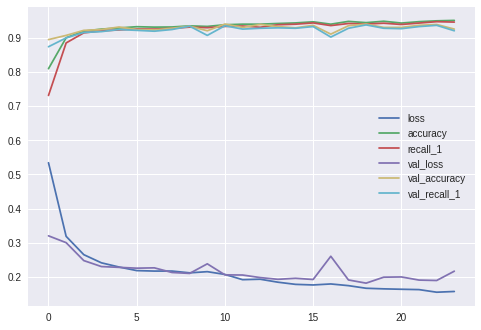

In [71]:
#plotting result
result2.plot()

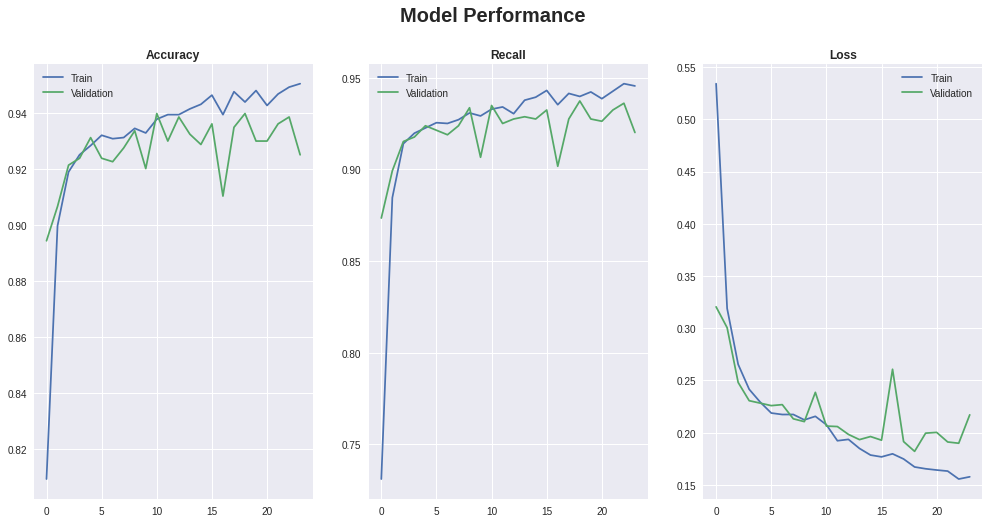

In [72]:
#plotting the graphs for model1 result
plot_result(result2, 'recall_1', 'val_recall_1')

In [73]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws={'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show()

<ipython-input-139-556899648b74>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model1.predict_generator(test_generator).argmax(axis=1)


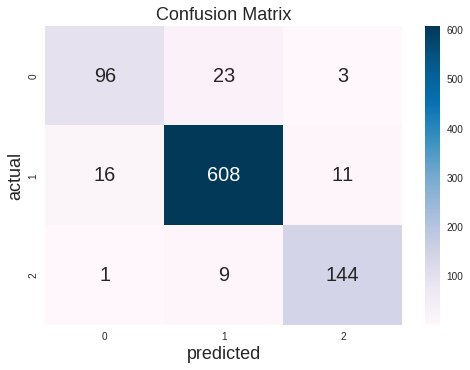

In [139]:
from sklearn.metrics import confusion_matrix
y_true=test_generator.labels
y_pred = model1.predict_generator(test_generator).argmax(axis=1)
evaluation(y_true,y_pred)

**Accuracy**

In [77]:
model1.evaluate(test_generator)
model2.evaluate(test_generator)

26/26 [==============================] - 2s 69ms/step - loss: 0.1830 - accuracy: 0.9423 - recall_1: 0.9362


[0.18301048874855042, 0.9423313140869141, 0.9361963272094727]

Hence, model 1 is **94.6%** and model 2 is **95.8%** accurate.